In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/cleandata.csv', delimiter='\t')
df

<ipython-input-58-8efab2bbc6be>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleandata.csv', delimiter='\t')


,Unnamed: 0,id,created_at,country,source,status,cycle,revenue,subs_date,renewal_date,freemium_end_date,unsubs_date,service_price,attempt_charging,success_billing
0,2,1,2023-09-13 09:20:20.727,TH,ivr,0,1,6,25/08/2023 14:02,26/08/2023 00:00,25/08/2023 00:00,NaN,6,1,1
1,205756,1,2023-09-13 08:07:10.540,LA,USSD,-1,weekly,10000,21/07/2023 20:48,28/07/2023 20:48,NaN,22/07/2023 11:10,10000,1,1
2,287235,1,2023-09-14 06:55:21.260,OM,cp1,-1,daily,0,30/08/2022 09:18,30/08/2022 09:18,NaN,30/10/2022 03:07,300,1,0
3,200000,1,2023-09-13 09:19:41.923,SN,web,0,daily,0,13/08/2023 00:09,13/08/2023 00:09,NaN,9999-01-01 00:00:00.000,150,1,0
4,205750,2,2023-09-13 08:07:10.701,LA,USSD,-1,weekly,10000,24/07/2023 08:07,04/08/2023 07:10,NaN,03/08/2023 07:22,10000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,28592,7105868,2023-09-13 22:55:11.043,TH,wap,0,daily,0,13/09/2023 20:57,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0
308907,28399,7106937,2023-09-13 22:55:11.542,TH,wap,0,daily,0,13/09/2023 19:08,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0
308908,28593,7108893,2023-09-13 22:55:12.415,TH,wap,0,daily,0,13/09/2023 17:00,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0
308909,28636,7111649,2023-09-13 22:55:13.699,TH,wap,0,daily,0,13/09/2023 09:51,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0


In [ ]:
features = df[['attempt_charging', 'success_billing']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-64-a4b7bb28e47b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = kmeans.fit_predict(filtered_df[['attempt_charging', 'success_billing']])


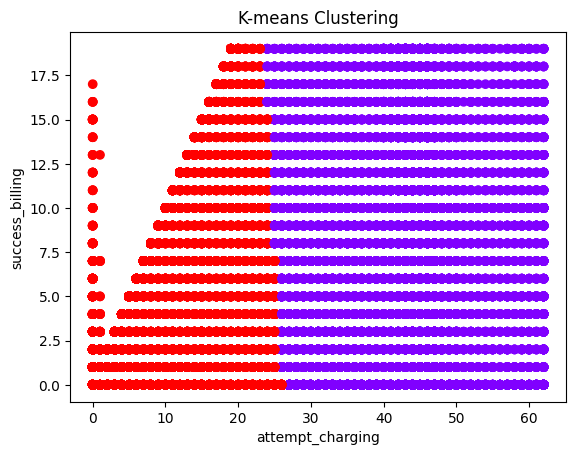

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

threshold = 2
outliers = np.abs(scaled_features) > threshold

mask = np.any(outliers, axis=1)

filtered_df = df[~mask]

k = 2
kmeans = KMeans(n_clusters=k)
filtered_df['cluster'] = kmeans.fit_predict(filtered_df[['attempt_charging', 'success_billing']])

# Plot the filtered data
plt.scatter(filtered_df['attempt_charging'], filtered_df['success_billing'], c=filtered_df['cluster'], cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('attempt_charging')
plt.ylabel('success_billing')
plt.show()